In [ ]:

import pandas as pd

dataset = pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:

print('Statitsik:\n',dataset.describe())

print('\n5 data teratas:\n',dataset.head())

print('\nCek Missing values:\n',dataset.isnull().sum())

Statitsik:
        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

5 data teratas:
    sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Cek Missing val

<Axes: >

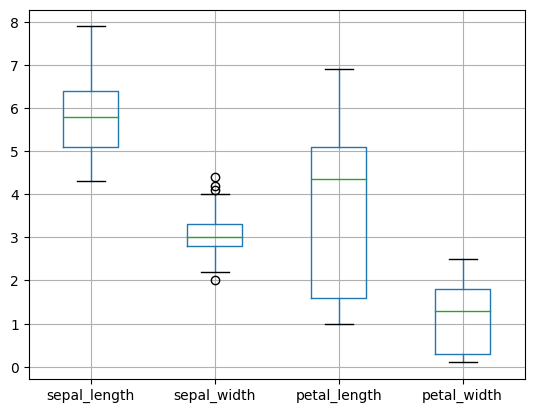

In [ ]:

dataset.boxplot()

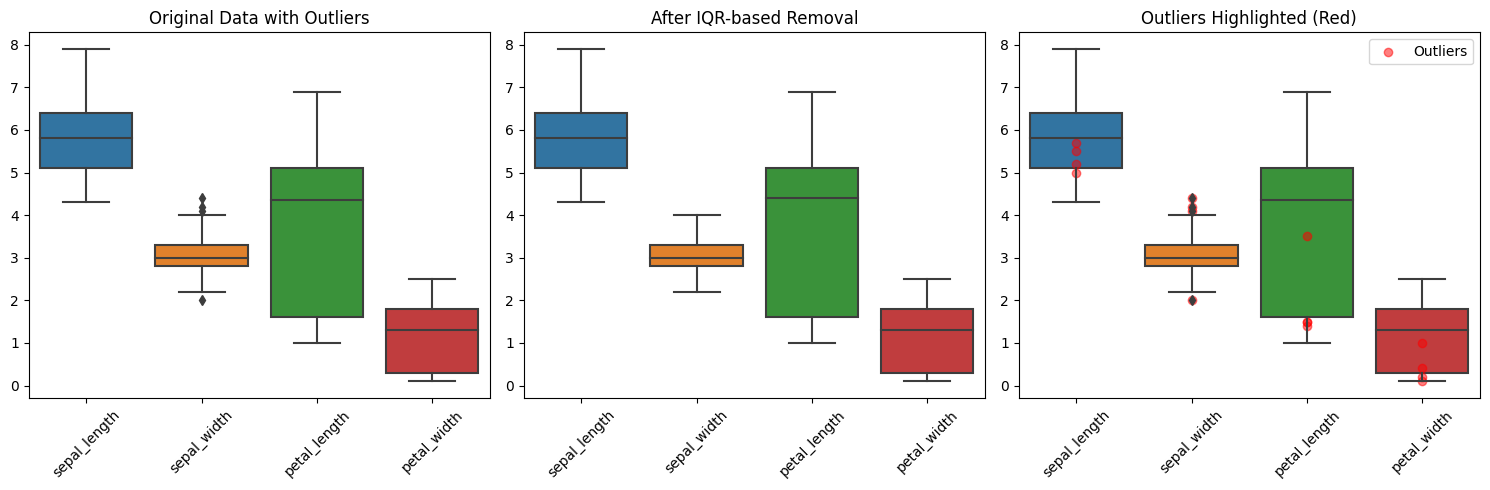

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
sns.boxplot(data=dataset)
plt.title('Original Data with Outliers')
plt.xticks(rotation=45)


numeric_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


Q1 = dataset[numeric_cols].quantile(0.25)
Q3 = dataset[numeric_cols].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = ((dataset[numeric_cols] < lower_bound) | (dataset[numeric_cols] > upper_bound)).any(axis=1)


dataset_iqr_cleaned = dataset[~outliers]


plt.subplot(1, 3, 2)
sns.boxplot(data=dataset_iqr_cleaned)
plt.title('After IQR-based Removal')
plt.xticks(rotation=45)


plt.subplot(1, 3, 3)
sns.boxplot(data=dataset)

outlier_data = dataset[outliers]
for i, col in enumerate(numeric_cols):
    y_data = outlier_data[col].dropna()
    x_data = [i]*len(y_data)
    plt.scatter(x_data, y_data, color='red', alpha=0.5, label='Outliers' if i==0 else "")
plt.title('Outliers Highlighted (Red)')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:

X = dataset_iqr_cleaned.drop(columns=['species'])
y = dataset_iqr_cleaned['species']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Akurasi Model: 0.9666666666666667

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


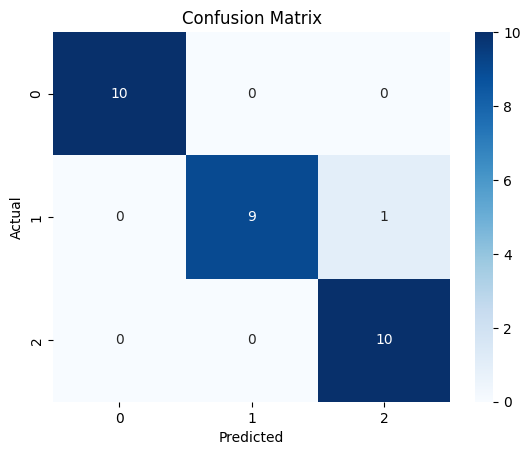

In [ ]:


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

RF = RandomForestClassifier(
    max_depth=5,               
    n_estimators=100,         
    min_samples_split=15,    
    max_features='sqrt',      
    random_state=42,
    class_weight='balanced'  
)
RF.fit(X_train_scaled, y_train)

y_pred = RF.predict(X_test_scaled)

print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

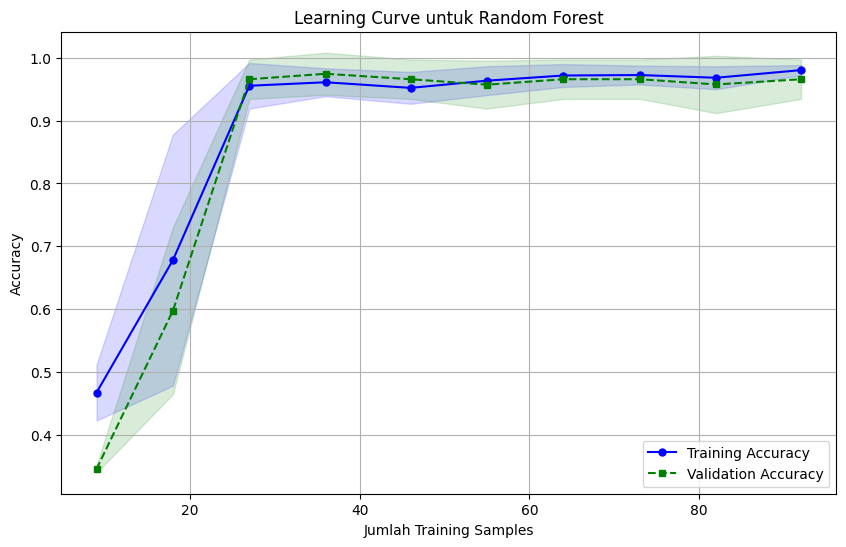

In [ ]:

from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    estimator=RF,
    X=X_train_scaled,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Jumlah Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve untuk Random Forest')
plt.legend(loc='lower right')
plt.show()
